In [1]:
import numpy as np 
import pandas as pd 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

from scipy.io import loadmat

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib import colormaps

from numpy.random import sample as sample

ModuleNotFoundError: No module named 'sklearn'

# Load MNIST data

In [2]:
mnist_train = loadmat('mnist/mnist_train.mat')
mnist_test = loadmat('mnist/mnist_test.mat')
X_train = mnist_train['train_X']
y_train = mnist_train['train_labels'].ravel()

y_train[y_train == 10] = 0 # I notice the labels have a value '10'. I update it to '0'
Xs, ys = shuffle(X_train, y_train, n_samples=1000, random_state=0) # Randomly selecting 1000 samples

In [3]:
df_mnist_train = pd.DataFrame(Xs)
df_mnist_train['label']=ys
print(df_mnist_train['label'].unique())

[1 4 0 2 7 6 5 9 8 3]


# Understanding the data

In [4]:
df_mnist_train.head(n=5) # List first five rows

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


### Uncomment the relevant code lines below and execute to print more description about the data

In [5]:
# Information about the data

df_mnist_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, 0 to label
dtypes: float64(784), uint8(1)
memory usage: 6.0 MB


In [6]:
# Get the data shape

df_mnist_train.shape

(1000, 785)

In [7]:
# List columns

df_mnist_train.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783, 'label'],
      dtype='object', length=785)

In [8]:
# List counts

df_mnist_train.count()

0        1000
1        1000
2        1000
3        1000
4        1000
         ... 
780      1000
781      1000
782      1000
783      1000
label    1000
Length: 785, dtype: int64

In [9]:
# Print basic statistics of the data

df_mnist_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.465000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.882895
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.447059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000


In [10]:
# MNIST dataset has ten digits. 
print(f"Median: {df_mnist_train['label'].median()}")
print(f"Mode: {df_mnist_train['label'].mode()}")
print(f"Mean: {df_mnist_train['label'].mean()}")
print(df_mnist_train['label'].unique())

Median: 4.0
Mode: 0    2
Name: label, dtype: uint8
Mean: 4.465
[1 4 0 2 7 6 5 9 8 3]


# Plotting Functions

In [11]:
def scatter2d(X, y):
    fig, ax = plt.subplots(figsize=(15,10))
    colors = colormaps['tab10'].colors

    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.5, cmap='tab10')

    # label a random sample of points
    points = len(y)*sample(100)
    for i in points.astype(int):
        ax.text(X[i,0], X[i,1], y[i], color=colors[int(y[i])], size=16, 
                path_effects=[pe.withStroke(linewidth=2, foreground="white")])
        
def scatter3d(X, y):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    colors = colormaps['tab10'].colors

    ax.mouse_init()
    ax.scatter(X[:,0], X[:,1], X[:,2], c=y, alpha=0.5, cmap='tab10')
    
    # label a random sample of points
    points = len(y)*sample(100)
    for i in points.astype(int):
        ax.text(X[i,0], X[i,1], X[i,2], y[i], color=colors[int(y[i])], size=16, 
                path_effects=[pe.withStroke(linewidth=2, foreground="white")])

# Principal Component Analysis

PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

Explained variance [5.11687301 3.74139077]
Explained variance ratio: [0.09704664 0.07095924]
Cumulative [0.09704664 0.16800588]


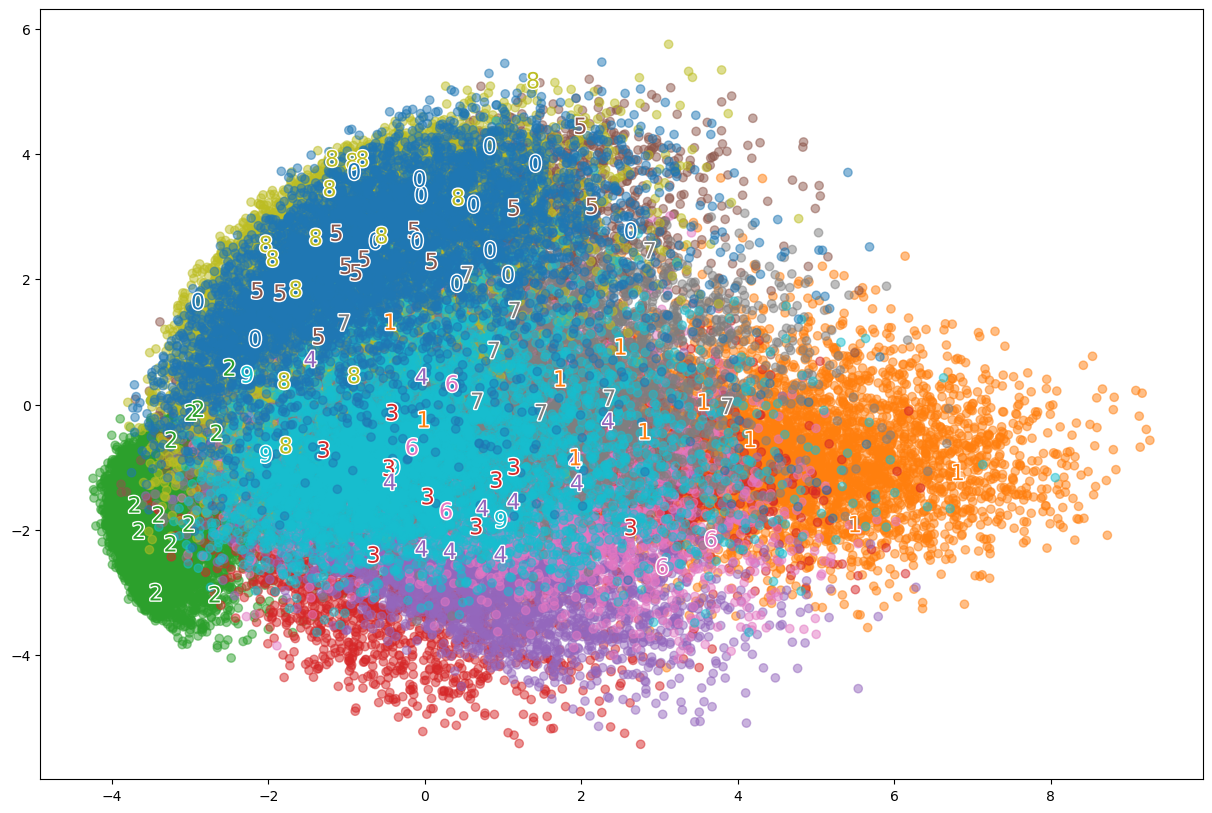

In [37]:
###
#Your code here. Try PCA with two components
###

pca = PCA(n_components=2)
pca.fit(X_train)


# Transform the data to the first two principal components
X_pca = pca.transform(X_train)


print('Explained variance', pca.explained_variance_) 
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Cumulative', pca.explained_variance_ratio_.cumsum())
# Plot the data
scatter2d(X_pca, y_train)

### To getter a better understanding of interaction of the dimensions plot the first three PCA dimensions

Explained variance [5.11687301 3.74139083 3.25270843]
Explained variance ratio: [0.09704664 0.07095924 0.06169089]
Cumulative [0.09704664 0.16800588 0.22969677]


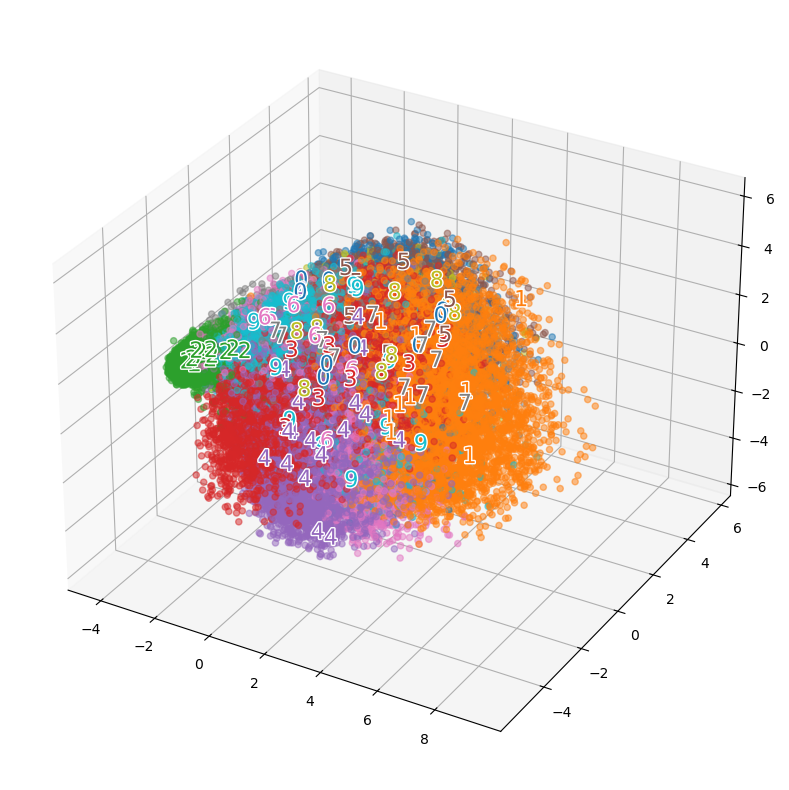

In [38]:
###
#Your code here. Try PCA with three components
###
pca = PCA(n_components=3)
pca.fit(X_train)

X_pca = pca.transform(X_train)

print('Explained variance', pca.explained_variance_) 
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Cumulative', pca.explained_variance_ratio_.cumsum())

scatter3d(X_pca, y_train)

# t-SNE on the MNIST dataset

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#

In [41]:
###
#Your code here. Try t-SNE with two components
tsne = TSNE(n_components=2)
print(tsne)
np.set_printoptions(suppress=True)
%time P = tsne.fit_transform(Xs)

TSNE()
CPU times: total: 1min 2s
Wall time: 4.58 s


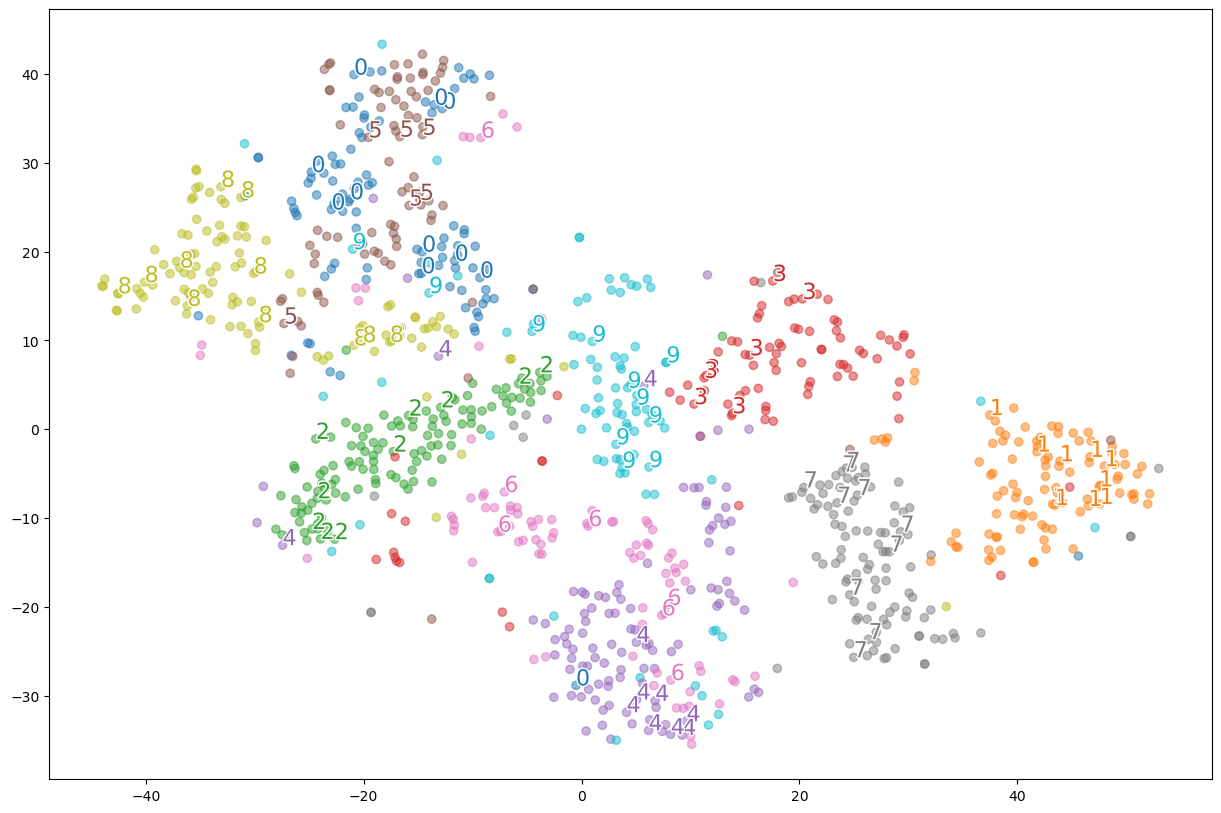

In [42]:
# Plot the results in 2d
scatter2d(P, ys)

In [43]:
###
#Your code here. Try t-SNE with three components
###
tsne = TSNE(n_components=3)
print(tsne)
np.set_printoptions(suppress=True)
%time P = tsne.fit_transform(Xs)

TSNE(n_components=3)
CPU times: total: 1min 57s
Wall time: 8.92 s


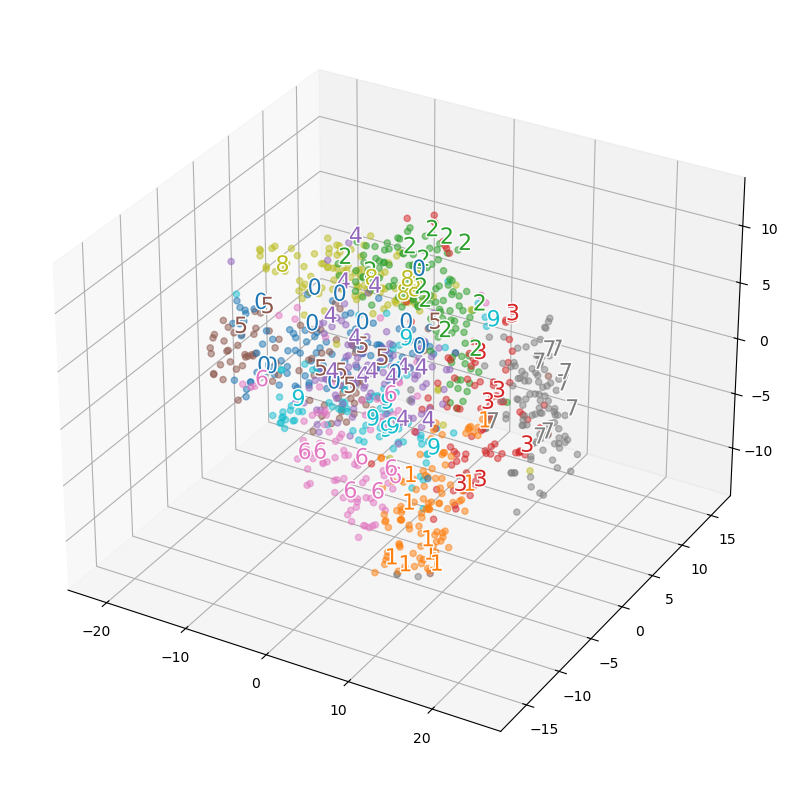

In [44]:
# Plot the results in 3d
scatter3d(P, ys)

# Exploration Tasks

t-SNE offers others parameters including perplexity. The perplexity is related to the number of nearest neighbors that is used in the manifold learning algorithms. Try varying perplexity and observe the changes in the output

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#

In [18]:
###
#Your code here
###

# Plot the results in 2d
# scatter2d(P, ys)

# Second attempt with higher perplexity

###
#Your code here
###

# Plot the results in 2d
# scatter2d(P, ys)

# UMAP

In [19]:
# Install umap-learn 
# Install from the terminal as conda install may not always work best from within notebook
# !conda install -c conda-forge umap-learn 
# Warning: There may be version incompatibility between umap and numpy versions greater than 2.1

###
#Your code here
###
#import umap               # install umap-learn to get this library
#import umap.umap_ as umap  # or maybe import like this?


# Random Projections

In [20]:
###
#Your code here
###


# K-means Clustering with n=10  

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [21]:
###
#Your code here
###
